In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import numpy.random
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
train_data=pd.read_csv("train.csv", index_col=0)
test_data=pd.read_csv("test.csv", index_col=0)

In [3]:
print(train_data.shape)

(15000, 69)


## familysize 이상치 제거

In [4]:
train_data = train_data[train_data['familysize'] < 30]
print('이상치 제거 후:',train_data.shape)

이상치 제거 후: (14678, 69)


In [5]:
drop_list=['hand', 'country', 'introelapse', 'testelapse','surveyelapse']

## 명목형변수 변환

In [6]:
train_data['education']=train_data['education'].astype('str')
test_data['education']=test_data['education'].astype('str')

train_data['engnat']=train_data['engnat'].astype('str')
test_data['engnat']=test_data['engnat'].astype('str')

train_data['urban']=train_data['urban'].astype('str')
test_data['urban']=test_data['urban'].astype('str')

train_data['married']=train_data['married'].astype('str')
test_data['married']=test_data['married'].astype('str')

In [7]:
#train_y=train_data['nerdiness']
#train_y = 2 - train_y.to_numpy()
#train_data.drop('nerdiness',axis=1,inplace=True)

## 큰 영향이 없는 변수 제거

In [8]:
train_data.drop(drop_list,axis=1,inplace=True)
test_data.drop(drop_list,axis=1,inplace=True)
#결측치 제거(train)
train_data.dropna(inplace=True)

In [9]:
tp_list=[i for i in train_data.columns if 'TIPI' in i]

# 평균값 대체, 역변환

In [10]:
train_data=train_data.fillna(train_data.mean())
test_data=test_data.fillna(test_data.mean())

#역변환
train_data[tp_list]=5-train_data[tp_list]
test_data[tp_list]=5-test_data[tp_list]

## tp 공식대로 계산(7->5로 변환)

In [11]:
train_data['tp_ex']=(train_data['TIPI1']+5-(train_data['TIPI6']))/2
train_data['tp_ag']=(5-(train_data['TIPI2'])+train_data['TIPI7'])/2
train_data['tp_co']=(train_data['TIPI3']+5-(train_data['TIPI8']))/2
train_data['tp_em']=(5-(train_data['TIPI4'])+train_data['TIPI9'])/2
train_data['tp_op']=(train_data['TIPI5']+5-(train_data['TIPI10']))/2

In [12]:
test_data['tp_ex']=(test_data['TIPI1']+5-(test_data['TIPI6']))/2
test_data['tp_ag']=(5-(test_data['TIPI2']+test_data['TIPI7']))/2
test_data['tp_co']=(test_data['TIPI3']+5-(test_data['TIPI8']))/2
test_data['tp_em']=(5-(test_data['TIPI4']+test_data['TIPI9']))/2
test_data['tp_op']=(test_data['TIPI5']+5-(test_data['TIPI10']))/2

## 마키아벨리즘 스코어 추가

In [13]:
Answers=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']

<AxesSubplot:>

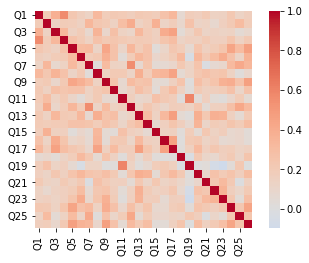

In [14]:
correlations = train_data[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [15]:
train_data['Mach_score'] = train_data[Answers].mean(axis = 1)
test_data['Mach_score'] = test_data[Answers].mean(axis = 1)
train_data.head()
test_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,religion,orientation,voted,married,familysize,ASD,tp_ex,tp_ag,tp_co,tp_em,tp_op,Mach_score
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,5.0,4.0,5.0,2.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,2.0,3,2.0,2.0,19,4.0,4.0,1.0,1.0,3.0,2.0,3.5,1.0,2.5,1.0,1.5,4.192308
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,5.0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0,4.0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,2.0,2,1.0,1.0,33,1.0,5.0,2.0,1.0,5.0,2.0,4.5,1.0,2.5,1.5,1.0,4.307692
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,1.0,5.0,5.0,4.0,4.0,3.0,4.0,5.0,2.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,3.0,4.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1.0,3,2.0,2.0,13,4.0,5.0,2.0,1.0,3.0,2.0,3.0,1.5,2.0,0.0,1.0,4.192308
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,2.0,2,1.0,1.0,28,2.0,2.0,2.0,1.0,3.0,2.0,4.0,1.5,3.0,0.5,1.0,3.769231
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,2.0,3.0,5.0,5.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2.0,3,2.0,2.0,15,4.0,5.0,2.0,1.0,2.0,2.0,3.0,0.5,3.0,1.5,2.0,4.076923


## 모델링

In [16]:
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)
print(train_data.shape, test_data.shape)

(13006, 82) (35452, 81)


## VCL 유효성 검사(?)

In [17]:
index1=train_data[train_data['VCL6']==1].index
train_data.drop(index1, inplace=True)

In [18]:
index2=train_data[train_data['VCL9']==1].index
train_data.drop(index2, inplace=True)

In [19]:
index3=train_data[train_data['VCL12']==1].index
train_data.drop(index3, inplace=True)

In [20]:
# 유효하지 않은 데이터 삭제
train_data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,gender,age,religion,orientation,voted,familysize,ASD,nerdiness,tp_ex,tp_ag,tp_co,tp_em,tp_op,Mach_score,education_1.0,education_2.0,education_3.0,education_4.0,education_nan,urban_0,urban_1,urban_2,urban_3,engnat_1.0,engnat_2.0,engnat_nan,married_1.0,married_2.0,married_3.0,married_nan
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,2.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,3.0,20,12.0,4.0,2.0,4.0,2.0,1,3.0,1.5,1.5,0.5,2.5,3.653846,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,1.0,3.0,2.0,0.0,2.0,3.0,0.0,4.0,3.0,3.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,2.0,49,2.0,1.0,1.0,4.0,2.0,1,1.5,1.0,1.5,4.0,2.0,3.269231,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,4.0,3.0,2.0,4.0,0.0,0.0,2.0,1.0,0.0,3.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,1.0,43,2.0,2.0,2.0,4.0,2.0,1,4.5,2.0,3.0,0.5,1.0,3.692308,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,17,1.0,1.0,2.0,2.0,2.0,1,2.5,2.0,3.0,3.0,1.5,3.500000,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,2.0,18,12.0,1.0,2.0,1.0,2.0,0,3.0,2.5,2.5,3.0,1.5,3.461538,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,5.0,4.0,5.0,5.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,3.0,1.0,4.0,4.0,5.0,2.0,1.0,4.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,3.0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,19,7.0,1.0,2.0,2.0,2.0,1,2.5,1.5,3.0,3.0,2.0,3.461538,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
14993,5.0,2.0,1.0,3.0,4.0,3.0,1.0,4.0,4.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,2.0,4.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,4.0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2.0,13,1.0,1.0,2.0,3.0,2.0,0,1.5,3.0,2.5,2.5,1.0,2.461538,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
14994,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,2.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,2.0,3.0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,2.0,36,12.0,5.0,2.0,5.0,2.0,1,2.5,1.5,3.5,2.5,1.5,4.423077,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0


## TPOT Oprimizer

In [21]:
from sklearn.model_selection import train_test_split
train_y=train_data['nerdiness']
#train_y = 2 - train_y.to_numpy()
train_data.drop('nerdiness',axis=1,inplace=True)
train_x=train_data
test_x=test_data

In [22]:
X_train, X_test, y_train, y_test=train_test_split(train_x, train_y, test_size=0.3, shuffle=True, stratify=train_y, random_state=123)

In [23]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,gender,age,religion,orientation,voted,familysize,ASD,tp_ex,tp_ag,tp_co,tp_em,tp_op,Mach_score,education_1.0,education_2.0,education_3.0,education_4.0,education_nan,urban_0,urban_1,urban_2,urban_3,engnat_1.0,engnat_2.0,engnat_nan,married_1.0,married_2.0,married_3.0,married_nan
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13131,2.0,4.0,4.0,3.0,2.0,5.0,5.0,2.0,3.0,5.0,1.0,3.0,3.0,2.0,4.0,2.0,2.0,5.0,2.0,3.0,5.0,3.0,4.0,5.0,3.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,1.0,26,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.5,2.0,2.0,3.269231,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4609,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,15,1.0,2.0,2.0,1.0,2.0,4.0,2.5,2.0,2.5,2.5,4.423077,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2004,3.0,5.0,4.0,5.0,2.0,3.0,5.0,4.0,5.0,3.0,5.0,4.0,3.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,4.0,1.0,5.0,5.0,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2.0,28,10.0,1.0,1.0,4.0,2.0,4.0,1.5,3.0,3.0,1.0,3.692308,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
9136,5.0,5.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,2.0,4.0,5.0,4.0,2.0,3.0,2.0,3.0,0.0,2.0,0.0,2.0,3.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,15,2.0,3.0,2.0,2.0,2.0,4.0,2.5,2.5,4.0,2.0,3.576923,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
8643,4.0,5.0,4.0,5.0,5.0,4.0,4.0,2.0,5.0,2.0,1.0,4.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,4.0,5.0,2.0,5.0,0.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,3.0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1.0,59,6.0,1.0,1.0,4.0,2.0,2.0,2.0,2.5,0.5,1.5,3.423077,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11970,4.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,2.0,5.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,4.0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,1.0,24,4.0,1.0,1.0,1.0,2.0,4.0,2.5,3.0,3.5,1.5,4.230769,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
14032,4.0,5.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,3.0,2.0,5.0,4.0,5.0,5.0,4.0,2.0,4.0,5.0,5.0,2.0,3.0,4.0,2.0,4.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,1.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,16,7.0,1.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.5,3.615385,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
9531,2.0,5.0,5.0,2.0,5.0,2.0,4.0,5.0,2.0,5.0,4.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,1.0,4.0,4.0,2.0,4.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,20,1.0,1.0,1.0,3.0,2.0,3.0,3.0,3.5,3.5,1.5,3.538462,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0


In [24]:
#import tpot
#pipeline_optimizer = tpot.TPOTClassifier(generations=20, 
#                                         population_size=50, 
#                                         cv=5,scoring='roc_auc',verbosity=2,early_stop=130,n_jobs=20) 
#pipeline_optimizer.fit(X_train, y_train) 
#print(pipeline_optimizer.score(X_test, y_test))

In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [26]:
model.fit(X_train, y_train.values.ravel())
pred_train=model.predict_proba(X_train)
print(model.score(X_train, y_train.values.ravel()))

1.0


In [27]:
pred_test=model.predict(X_test)
pred_test=pd.DataFrame(pred_test)
pred_test.columns=['pred_y']
print(pred_test.head(5))

   pred_y
0       1
1       0
2       1
3       1
4       0


In [28]:
#제출용
pred_test=model.predict(test_x)
pred_test=pd.DataFrame(pred_test)
pred_test.columns=['pred_y']
print(pred_test.head(5))
result=pred_test['pred_y']

   pred_y
0       1
1       1
2       1
3       1
4       1


In [29]:
submission = pd.DataFrame({'index' :test_data.index, 'nerdiness':result})
submission.to_csv('submission_randomforest.csv',index=False)